In [1]:
import pandas as pd
cleaned = pd.read_csv("clean_listings_data.csv", low_memory=False)
cleaned.shape

(43609, 22)

In [2]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43609 entries, 0 to 43608
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            43607 non-null  object 
 1   name                          43608 non-null  object 
 2   host_id                       43609 non-null  float64
 3   host_name                     43586 non-null  object 
 4   host_is_superhost             41977 non-null  object 
 5   neighbourhood_cleansed        43597 non-null  object 
 6   neighbourhood_group_cleansed  43597 non-null  object 
 7   neighborhood_overview         19214 non-null  object 
 8   latitude                      43597 non-null  float64
 9   longitude                     43597 non-null  float64
 10  property_type                 43597 non-null  object 
 11  room_type                     43597 non-null  object 
 12  accommodates                  43597 non-null  float64
 13  b

In [5]:
cleaned.drop(['price','bathrooms_text'], axis=1, inplace=True)
cleaned.head(5)

,id,name,host_id,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,neighborhood_overview,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,reviews_per_month,price_clean,bathrooms_num
0,2708,"Run Runyon, Beaut Furn Mirror Mini-Suit w/ Fir...",3008.0,Chas.,t,Hollywood,City of Los Angeles,"Walk and run to Runyon Canyon, it is open!<br ...",34.09625,-118.34605,Private room in rental unit,Private room,1.0,1.0,1.0,45.0,4.87,0.33,81.0,1.0
1,2732,Zen Life at the Beach,3041.0,Louise-Diane,f,Santa Monica,Other Cities,"This is the best part of Santa Monica. Quiet, ...",34.00440,-118.48095,Private room in rental unit,Private room,1.0,1.0,1.0,24.0,4.41,0.14,110.0,1.0
2,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207.0,Bernadine,f,Bellflower,Other Cities,What makes the neighborhood unique is that the...,33.87490,-118.11515,Entire rental unit,Entire home/apt,2.0,1.0,NaN,0.0,NaN,NaN,NaN,1.0
3,6033,Poolside Serenity Studio,11619.0,Sarah,f,Woodland Hills,City of Los Angeles,NaN,34.16887,-118.64478,Entire bungalow,Entire home/apt,3.0,1.0,NaN,19.0,4.38,0.10,NaN,1.0
4,6931,"RUN Runyon, Beau Furn Rms Terrace Hollyw Hill ...",3008.0,Chas.,t,Hollywood,City of Los Angeles,We are in the middle of one of the great citie...,34.09626,-118.34372,Private room in rental unit,Private room,1.0,1.0,1.0,37.0,4.86,0.19,88.0,1.0


In [15]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43609 entries, 0 to 43608
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            43607 non-null  object 
 1   name                          43608 non-null  object 
 2   host_id                       43609 non-null  float64
 3   host_name                     43586 non-null  object 
 4   host_is_superhost             41977 non-null  object 
 5   neighbourhood_cleansed        43597 non-null  object 
 6   neighbourhood_group_cleansed  43597 non-null  object 
 7   neighborhood_overview         19214 non-null  object 
 8   latitude                      43597 non-null  float64
 9   longitude                     43597 non-null  float64
 10  property_type                 43597 non-null  object 
 11  room_type                     43597 non-null  object 
 12  accommodates                  43597 non-null  float64
 13  b

In [13]:
cleaned.to_csv("clean_data.csv", index=False)

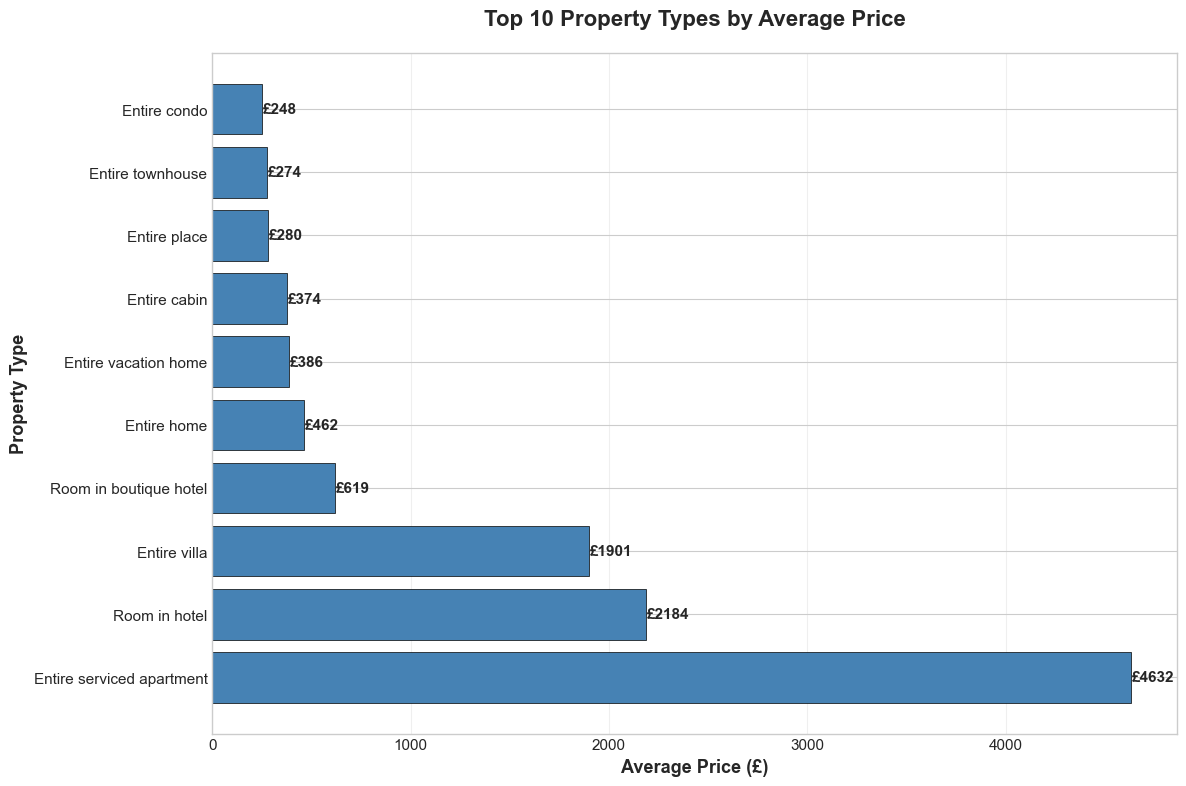

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for professional-looking plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 11

# AVERAGE PRICE BY PROPERTY TYPE (Top 10)

fig1, ax1 = plt.subplots(figsize=(12, 8))
property_price = cleaned.groupby('property_type')['price_clean'].agg(['mean', 'count']).reset_index()
property_price = property_price[property_price['count'] >= 20].nlargest(10, 'mean')
bars = ax1.barh(property_price['property_type'], property_price['mean'], color='steelblue', edgecolor='black', linewidth=0.5)
ax1.set_xlabel('Average Price (£)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Property Type', fontsize=13, fontweight='bold')
ax1.set_title('Top 10 Property Types by Average Price', fontsize=16, fontweight='bold', pad=20)
ax1.grid(axis='x', alpha=0.3)
for i, (bar, val) in enumerate(zip(bars, property_price['mean'])):
    ax1.text(val + 5, bar.get_y() + bar.get_height()/2, f'£{val:.0f}', 
             va='center', ha='left', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.savefig('1_property_price.png', dpi=300, bbox_inches='tight')
plt.show()


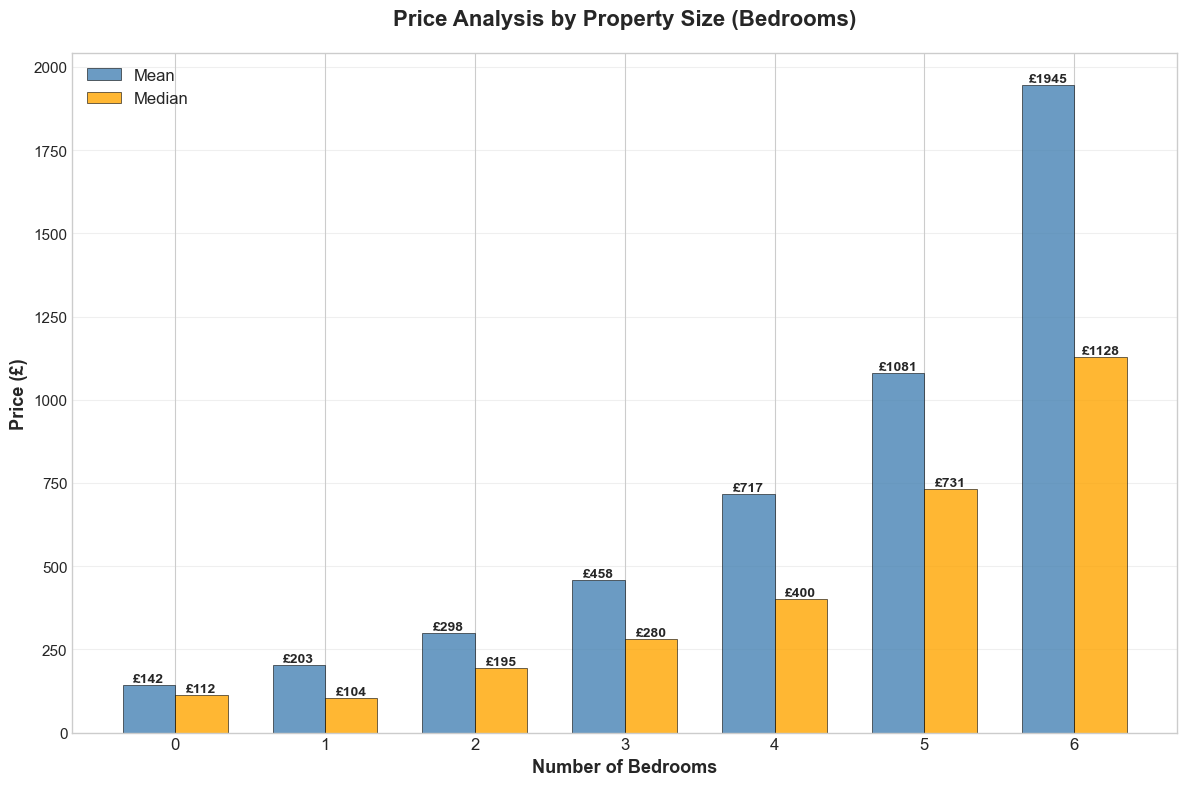

In [55]:
# 4. PRICE BY NUMBER OF BEDROOMS
# ============================================================================
fig4, ax4 = plt.subplots(figsize=(12, 8))
bedroom_data = cleaned[cleaned['bedrooms'].notna() & cleaned['price_clean'].notna() & (cleaned['bedrooms'] <= 6)]
bedroom_stats = bedroom_data.groupby('bedrooms')['price_clean'].agg(['mean', 'median', 'count']).reset_index()
bedroom_stats = bedroom_stats[bedroom_stats['count'] >= 20]
x_pos = np.arange(len(bedroom_stats))
width = 0.35
bars1 = ax4.bar(x_pos - width/2, bedroom_stats['mean'], width, label='Mean', color='steelblue', alpha=0.8, edgecolor='black', linewidth=0.5)
bars2 = ax4.bar(x_pos + width/2, bedroom_stats['median'], width, label='Median', color='orange', alpha=0.8, edgecolor='black', linewidth=0.5)
ax4.set_xlabel('Number of Bedrooms', fontsize=13, fontweight='bold')
ax4.set_ylabel('Price (£)', fontsize=13, fontweight='bold')
ax4.set_title('Price Analysis by Property Size (Bedrooms)', fontsize=16, fontweight='bold', pad=20)
ax4.set_xticks(x_pos)
ax4.set_xticklabels([f'{int(b)}' for b in bedroom_stats['bedrooms']], fontsize=12)
ax4.legend(fontsize=12, loc='upper left')
ax4.grid(axis='y', alpha=0.3)
# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'£{height:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.savefig('4_bedroom_price.png', dpi=300, bbox_inches='tight')
plt.show()


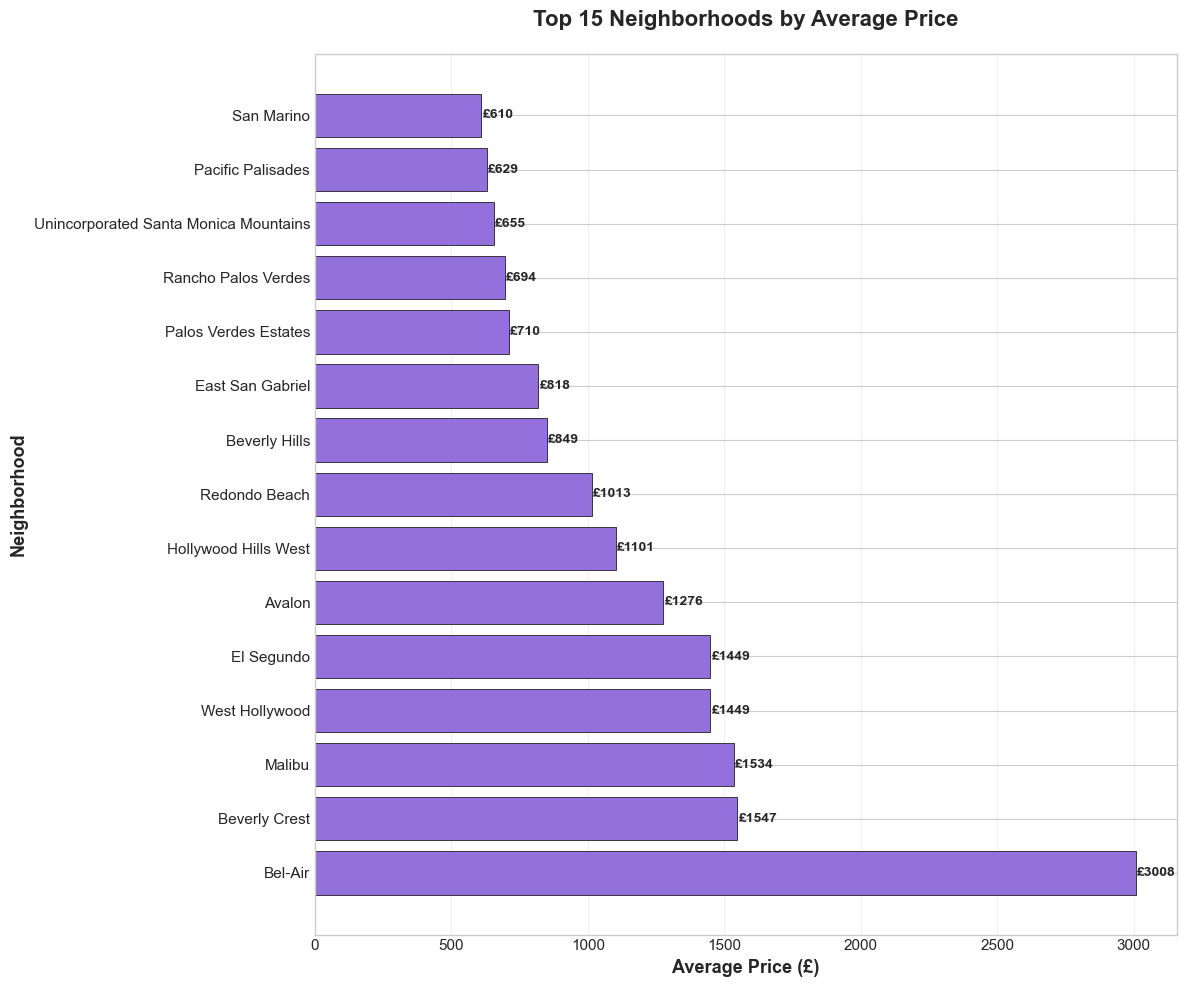

In [57]:
#  TOP 15 NEIGHBORHOODS BY AVERAGE PRICE

fig5, ax5 = plt.subplots(figsize=(12, 10))
neighborhood_price = cleaned.groupby('neighbourhood_cleansed').agg({
    'price_clean': 'mean',
    'id': 'count'
}).reset_index()
neighborhood_price.columns = ['neighbourhood', 'avg_price', 'count']
neighborhood_price = neighborhood_price[neighborhood_price['count'] >= 20].nlargest(15, 'avg_price')
bars = ax5.barh(neighborhood_price['neighbourhood'], neighborhood_price['avg_price'], color='mediumpurple', edgecolor='black', linewidth=0.5)
ax5.set_xlabel('Average Price (£)', fontsize=13, fontweight='bold')
ax5.set_ylabel('Neighborhood', fontsize=13, fontweight='bold')
ax5.set_title('Top 15 Neighborhoods by Average Price', fontsize=16, fontweight='bold', pad=20)
ax5.grid(axis='x', alpha=0.3)
for i, (bar, val) in enumerate(zip(bars, neighborhood_price['avg_price'])):
    ax5.text(val + 5, bar.get_y() + bar.get_height()/2, f'£{val:.0f}', 
             va='center', ha='left', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.savefig('5_neighborhood_price.png', dpi=300, bbox_inches='tight')
plt.show()

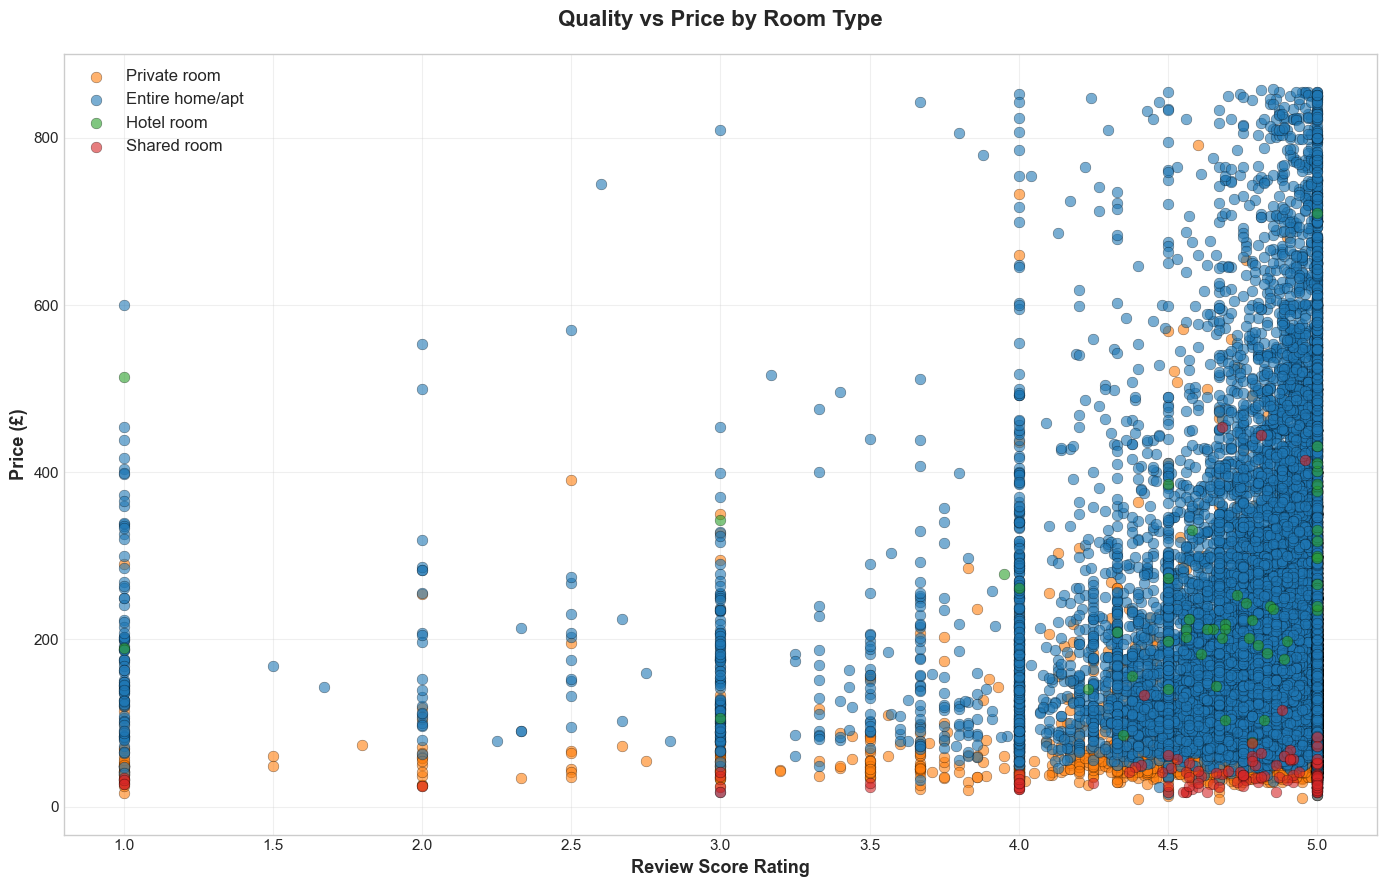


✅ All visualizations generated successfully!
📁 Saved 8 separate high-resolution PNG files:
   1. Figure 1 saved
   2. Figure 2 saved
   3. Figure 3 saved
   4. Figure 4 saved
   5. Figure 5 saved
   6. Figure 6 saved
   7. Figure 7 saved
   8. Figure 8 saved


In [63]:
#  REVIEW SCORE vs PRICE BY ROOM TYPE

fig8, ax8 = plt.subplots(figsize=(14, 9))
score_data = cleaned[(cleaned['review_scores_rating'].notna()) & 
                (cleaned['price_clean'].notna()) &
                (cleaned['price_clean'] < cleaned['price_clean'].quantile(0.95))]

# Define custom colors for room types
room_colors = {'Entire home/apt': '#1f77b4', 'Private room': '#ff7f0e', 
               'Hotel room': '#2ca02c', 'Shared room': '#d62728'}

for room_type in score_data['room_type'].unique():
    subset = score_data[score_data['room_type'] == room_type]
    color = room_colors.get(room_type, '#8c564b')
    ax8.scatter(subset['review_scores_rating'], subset['price_clean'], 
               label=room_type, alpha=0.6, s=60, color=color, edgecolors='black', linewidth=0.3)

ax8.set_xlabel('Review Score Rating', fontsize=13, fontweight='bold')
ax8.set_ylabel('Price (£)', fontsize=13, fontweight='bold')
ax8.set_title('Quality vs Price by Room Type', fontsize=16, fontweight='bold', pad=20)
ax8.legend(fontsize=12, loc='upper left', framealpha=0.9)
ax8.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('8_quality_vs_price.png', dpi=300, bbox_inches='tight')
plt.show()


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for professional-looking plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 11



/var/folders/9_/qgpqjs8j00s991jzsw_0l7jh0000gn/T/ipykernel_89200/616649256.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quality_data['score_bin'] = pd.cut(quality_data['review_scores_rating'],
/var/folders/9_/qgpqjs8j00s991jzsw_0l7jh0000gn/T/ipykernel_89200/616649256.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  score_price = quality_data.groupby('score_bin')['price_clean'].mean()


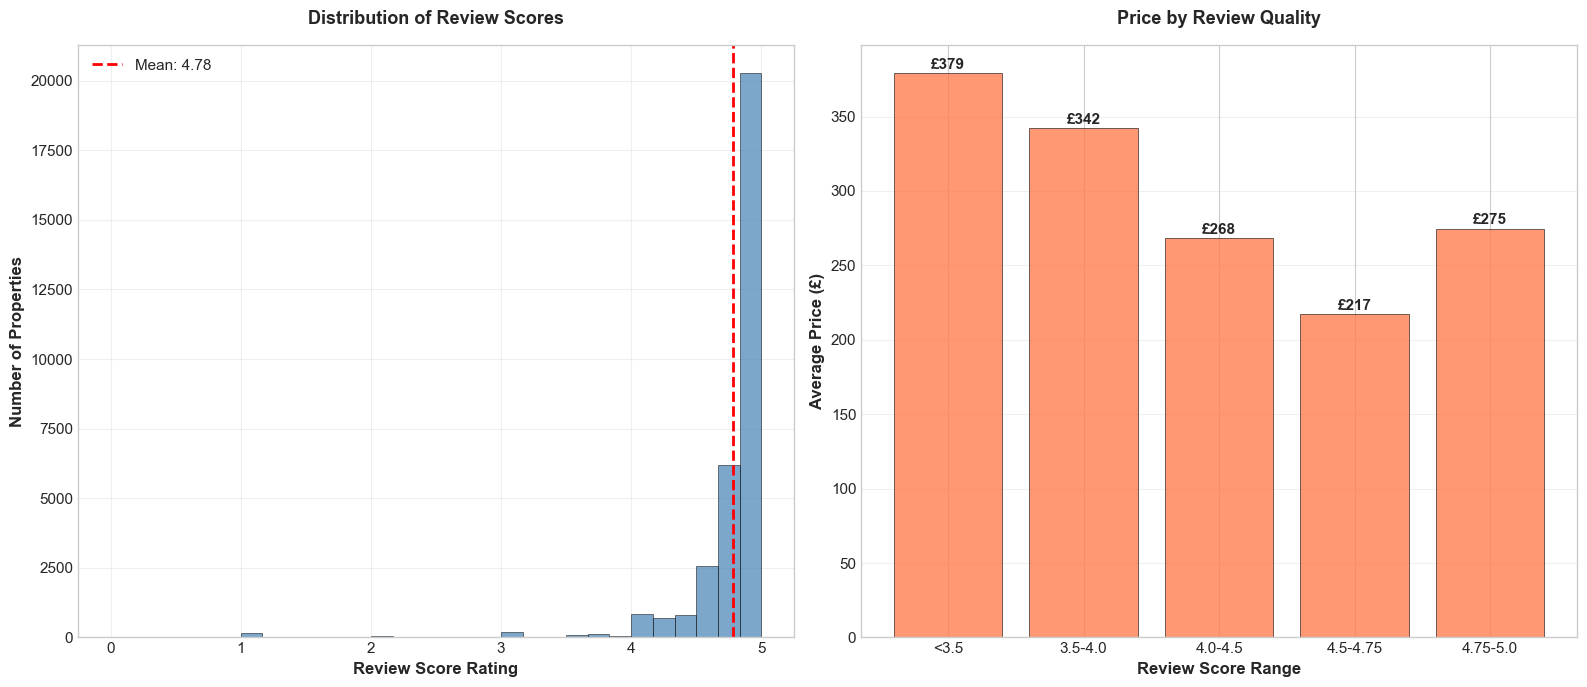

In [77]:
#REVIEW QUALITY ANALYSIS: Impact on Pricing

fig6, axes = plt.subplots(1, 2, figsize=(16, 7))

# Review score distribution
review_data = cleaned[cleaned['review_scores_rating'].notna()]
axes[0].hist(review_data['review_scores_rating'], bins=30, 
             color='steelblue', edgecolor='black', linewidth=0.5, alpha=0.7)
axes[0].axvline(review_data['review_scores_rating'].mean(), 
                color='red', linestyle='--', linewidth=2, label=f'Mean: {review_data["review_scores_rating"].mean():.2f}')
axes[0].set_xlabel('Review Score Rating', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Properties', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Review Scores', fontsize=13, fontweight='bold', pad=15)
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3)

# Price vs Review Score
quality_data = cleaned[(cleaned['review_scores_rating'].notna()) & 
                       (cleaned['price_clean'].notna())]
# Create score bins
quality_data['score_bin'] = pd.cut(quality_data['review_scores_rating'], 
                                   bins=[0, 3.5, 4.0, 4.5, 4.75, 5.0],
                                   labels=['<3.5', '3.5-4.0', '4.0-4.5', '4.5-4.75', '4.75-5.0'])
score_price = quality_data.groupby('score_bin')['price_clean'].mean()

axes[1].bar(range(len(score_price)), score_price.values,
            color='coral', edgecolor='black', linewidth=0.5, alpha=0.8)
axes[1].set_xticks(range(len(score_price)))
axes[1].set_xticklabels(score_price.index, rotation=0)
axes[1].set_xlabel('Review Score Range', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Price (£)', fontsize=12, fontweight='bold')
axes[1].set_title('Price by Review Quality', fontsize=13, fontweight='bold', pad=15)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(score_price.values):
    axes[1].text(i, v + 3, f'£{v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('6_review_quality_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


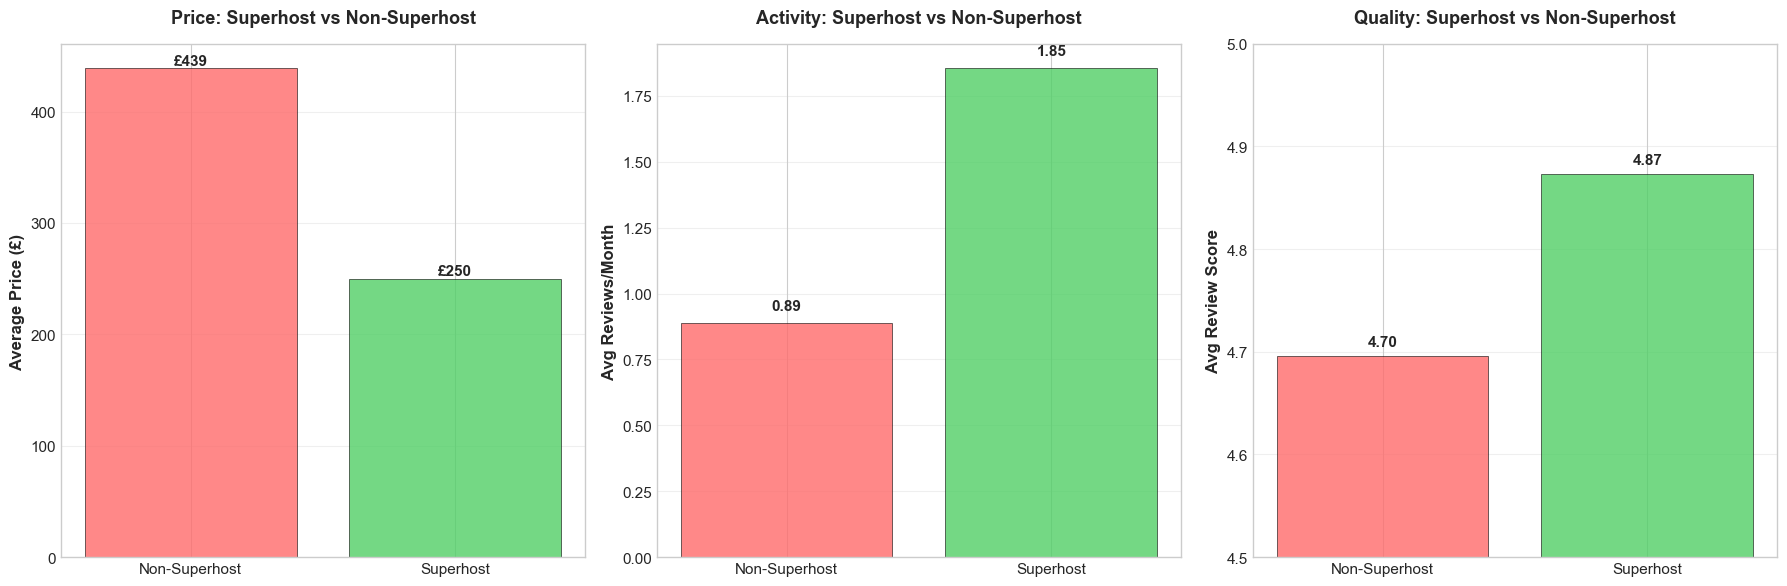

In [83]:
# SUPERHOST COMPARISON

import pandas as pd

fig7, axes = plt.subplots(1, 3, figsize=(18, 6))

# --- NEW: normalise host_is_superhost to exactly two categories (False/True) ---
valid_map = {
    'f': False, 'F': False, 'false': False, 'False': False, False: False,
    't': True,  'T': True,  'true': True,  'True': True,  True: True
}

cleaned = cleaned.copy()
cleaned['host_is_superhost_bool'] = cleaned['host_is_superhost'].map(valid_map)

# Keep only rows where we could map to True/False
superhost_data = cleaned[cleaned['host_is_superhost_bool'].notna()]

# Ensure consistent order: [Non-Superhost (False), Superhost (True)]
index_order = [False, True]
labels = ['Non-Superhost', 'Superhost']

# -------------------- Price comparison --------------------
price_comparison = (
    superhost_data
    .groupby('host_is_superhost_bool')['price_clean']
    .mean()
    .reindex(index_order)
)

axes[0].bar(range(len(price_comparison)), price_comparison.values,
            color=['#ff6b6b', '#51cf66'], edgecolor='black', linewidth=0.5, alpha=0.8)
axes[0].set_xticks(range(len(price_comparison)))
axes[0].set_xticklabels(labels)
axes[0].set_ylabel('Average Price (£)', fontsize=12, fontweight='bold')
axes[0].set_title('Price: Superhost vs Non-Superhost', fontsize=13, fontweight='bold', pad=15)
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(price_comparison.values):
    if pd.notna(v):  # avoid errors if a group is missing
        axes[0].text(i, v + 3, f'£{v:.0f}', ha='center', fontweight='bold')

# -------------------- Reviews per month comparison --------------------
review_comparison = (
    superhost_data
    .groupby('host_is_superhost_bool')['reviews_per_month']
    .mean()
    .reindex(index_order)
)

axes[1].bar(range(len(review_comparison)), review_comparison.values,
            color=['#ff6b6b', '#51cf66'], edgecolor='black', linewidth=0.5, alpha=0.8)
axes[1].set_xticks(range(len(review_comparison)))
axes[1].set_xticklabels(labels)
axes[1].set_ylabel('Avg Reviews/Month', fontsize=12, fontweight='bold')
axes[1].set_title('Activity: Superhost vs Non-Superhost', fontsize=13, fontweight='bold', pad=15)
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate(review_comparison.values):
    if pd.notna(v):
        axes[1].text(i, v + 0.05, f'{v:.2f}', ha='center', fontweight='bold')

# -------------------- Review score comparison --------------------
score_comparison = (
    superhost_data
    .groupby('host_is_superhost_bool')['review_scores_rating']
    .mean()
    .reindex(index_order)
)

axes[2].bar(range(len(score_comparison)), score_comparison.values,
            color=['#ff6b6b', '#51cf66'], edgecolor='black', linewidth=0.5, alpha=0.8)
axes[2].set_xticks(range(len(score_comparison)))
axes[2].set_xticklabels(labels)
axes[2].set_ylabel('Avg Review Score', fontsize=12, fontweight='bold')
axes[2].set_title('Quality: Superhost vs Non-Superhost', fontsize=13, fontweight='bold', pad=15)
axes[2].grid(axis='y', alpha=0.3)
axes[2].set_ylim([4.5, 5.0])

for i, v in enumerate(score_comparison.values):
    if pd.notna(v):
        axes[2].text(i, v + 0.01, f'{v:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('7_superhost_comparison.png', dpi=300, bbox_inches='tight')
plt.show()